Использование данных без знаков препинания, но без приведения к начальной форме

Для каждого пользователя есть метка: 1 - положительный, -1 -  отрицательный. Информация о метках содержится в таблице author.

Все сообщения пользователя объединить в единый отзыв. Для разметки использовать усредненный вектор.

In [11]:
%run user_data.ipynb
%run fun_to_work.ipynb

Параметры

In [12]:
file_name = 'work2'
w2v_name = 'w2v_w2'
punctuation = True
hashtag = True
url = True
stem = False
errors = False
size = 200
window = 5
min_count = 3

In [13]:
marks = mess_to_txt(user, file_name, punctuation, hashtag, url, stem, errors)

99.77504086494446


In [14]:
create_model_w2v(file_name, w2v_name, size, window, min_count)

2020-04-29 01:11:26,806 : INFO : collecting all words and their counts
2020-04-29 01:11:26,814 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-29 01:11:26,911 : INFO : collected 23926 word types from a corpus of 106938 raw words and 3614 sentences
2020-04-29 01:11:26,912 : INFO : Loading a fresh vocabulary
2020-04-29 01:11:26,943 : INFO : effective_min_count=3 retains 5723 unique words (23% of original 23926, drops 18203)
2020-04-29 01:11:26,944 : INFO : effective_min_count=3 leaves 84886 word corpus (79% of original 106938, drops 22052)
2020-04-29 01:11:26,996 : INFO : deleting the raw counts dictionary of 23926 items
2020-04-29 01:11:26,998 : INFO : sample=0.001 downsamples 34 most-common words
2020-04-29 01:11:26,999 : INFO : downsampling leaves estimated 72897 word corpus (85.9% of prior 84886)
2020-04-29 01:11:27,025 : INFO : estimated required memory for 5723 words and 200 dimensions: 12018300 bytes
2020-04-29 01:11:27,026 : INFO : resetting lay

2.9288597106933594

In [15]:
model = load_model_w2v(w2v_name)

2020-04-29 01:11:34,385 : INFO : loading Word2Vec object from w2v_w2
2020-04-29 01:11:34,539 : INFO : loading wv recursively from w2v_w2.wv.* with mmap=None
2020-04-29 01:11:34,540 : INFO : setting ignored attribute vectors_norm to None
2020-04-29 01:11:34,541 : INFO : loading vocabulary recursively from w2v_w2.vocabulary.* with mmap=None
2020-04-29 01:11:34,542 : INFO : loading trainables recursively from w2v_w2.trainables.* with mmap=None
2020-04-29 01:11:34,543 : INFO : setting ignored attribute cum_table to None
2020-04-29 01:11:34,545 : INFO : loaded w2v_w2


In [16]:
text_vec = texts_to_vec(file_name, model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


2.0043065547943115


In [17]:
new_df = create_data_frame(text_vec, marks)

time =  58.52220964431763
f1 =  0.6304814351272424
acc =  0.531578947368421
rec =  0.6943553223388306
prec =  0.5988166367476712
auc =  0.5157779497697039


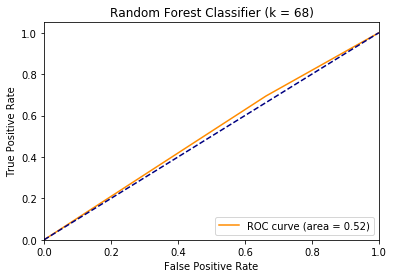

In [18]:
class_random_forest(new_df, 'marks', 5, 1, 100)